In [36]:
!pip install keras_tuner

Importing and exploring the dataset

In [37]:
# importing pandas module
import pandas as pd
# importing dataset
data = pd.read_csv('./dataset/bank+marketing/bank/bank-full.csv', sep=';')
# heading
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Next, let us use the info() method to find more information about the dataset.



In [38]:
# printing info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Notice that we have 45211 observations, and most columns are object types. We will now use the LabelEncoding method to change the typed object values into numeric ones.

In [39]:
# importing the module
from sklearn import preprocessing

# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in multiple columns
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['education']= label_encoder.fit_transform(data['education'])
data['default']= label_encoder.fit_transform(data['default'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['loan']= label_encoder.fit_transform(data['loan'])
data['contact']= label_encoder.fit_transform(data['contact'])
data['month']= label_encoder.fit_transform(data['month'])
data['poutcome']= label_encoder.fit_transform(data['poutcome'])
data['y']= label_encoder.fit_transform(data['y'])

Let us plot the bar chart for the output values using Matplotlib:

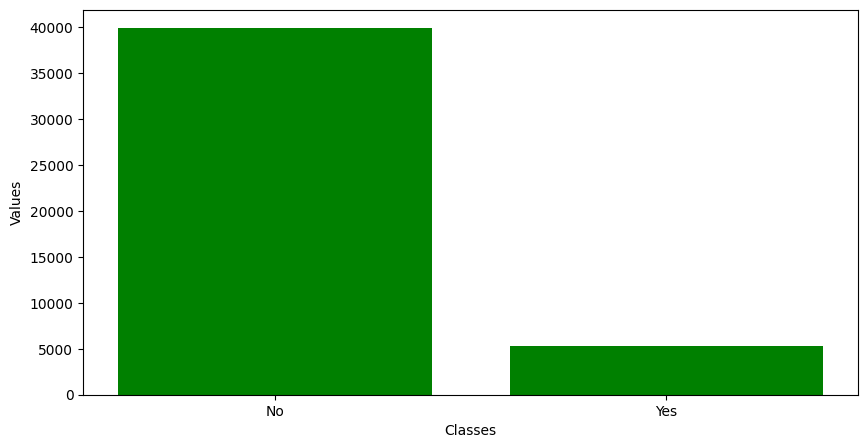

In [40]:
# importing matplotlib
import matplotlib.pyplot as plt
# plotting
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(['No',"Yes"], data.y.value_counts(), color ='green',
        width = 0.8)
# labeling
plt.xlabel("Classes")
plt.ylabel("Values")
plt.show()

### Splitting dataset
Now, we will divide the dataset into input values and output classes.

In [41]:
# splitting dataset
X = data.drop('y', axis=1)
y = data['y']

Let us now split the dataset set input testing and training data.



In [42]:
# importing the module
from sklearn.model_selection import train_test_split
# splitting into training data and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

As you can see, we have assigned 70% of the data to the training and the remaining 30% to the testing.
### Building neural network model for binary classification using TensorFlow
Now, we will use TensorFlow to build a neural network for binary classification.

In [43]:
# importing required module
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential
# defining neural network model
model = Sequential()
# adding input layer with 16 nodes, specifying the input shape
model.add(InputLayer(shape=(16,))) # Corrected line: Providing input_shape as a tuple
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
# adding output layer to neural network model
model.add(Dense(1, activation='sigmoid'))

Compiling dataset

In [44]:
# compile the model with loss function binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

As you can see, we have used Adam as an n-optimizer and binary_crossentropy as the loss function. The binary_crossentropy function is used in binary classification and computes the cross-entropy loss between true and predicted labels.

Now, it is time to train the model using the training dataset.

In [45]:
# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6971 - loss: 11.0524
Epoch 2/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8681 - loss: 0.6333
Epoch 3/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8699 - loss: 0.5257
Epoch 4/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8761 - loss: 0.4645
Epoch 5/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8734 - loss: 0.4988
Epoch 6/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8744 - loss: 0.4562
Epoch 7/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8776 - loss: 0.4427
Epoch 8/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 0.3845
Epoch 9/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8767 - loss: 0.3668
Epoch 10/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8686 - loss: 0.4510
Epoch 11/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8743 - loss: 0.3914
Epoch 12/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/ste

We have fixed the number of epochs to 50. An epoch means training the neural network with all the training data for one cycle. You can change the number of epochs to get an optimum solution.
### Evaluating the trained model
Now we will use the testing data to evaluate the model’s performance. Let us use the testing data to make predictions using our trained model and evaluate the model.

In [46]:
# evaluate the model with test dataset
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

424/424 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8764 - loss: 0.3123
Test Accuracy: 0.8736360669136047


The above output shows that our model could correctly classify 85% of the testing dataset.

### Parameter tuning to find the optimum number of nodes and epochs
Now, we will learn how to find the optimum number of nodes in the hidden layer and epoch value. We will use the Keras parameter tunning method known as Hyperband tunning.

We will first create a function that will initialize our model for binary classification with a maximum and a minimum number of nodes in the hidden layer.

In [47]:
# importing the module
from tensorflow import keras
from tensorflow.keras.layers import InputLayer

# function to create model
def model_builder(hp):
    # initializaing the classification model
    model = keras.Sequential()
    # Providing input_shape as a tuple (16,)
    model.add(InputLayer(shape=(16,)))  # Changed line
    # specifying the maximum and minimum nodes
    hp_units = hp.Int('units', min_value=5, max_value=100)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    # comppiling the model with loss function binary crossentropy
    model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    # return classification model
    return model

Let us initialize the hyperband tunning from the Keras module.



In [48]:
# importing the module
import keras_tuner as kt
import tensorflow as tf
# calling the function using hyperband
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=100)

Reloading Tuner from ./untitled_project/tuner0.json


The Hyperband tuning algorithm uses adaptive resource allocation and early stopping to converge quickly on a high-performing model. It ensures that our model is not overfitted and stops the iterations once a specified result is achieved.

In [49]:
# early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

We will start the tuner search and find the optimum number of nodes in the hidden layer.

In [50]:
# initializing the tunner
tuner.search(X,y, epochs=100, validation_split=0.2, callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print("Optimin number of nodes in hidden layer are :", best_hps.get('units'))

Optimin number of nodes in hidden layer are : 68


As you can see, the optimum number of nodes in the hidden layer is 54. Now, let us also find the optimum number of epochs using the parameters returned by the tuner search.

In [51]:
# creating model with optimimum parameters
model = tuner.hypermodel.build(best_hps)
# model training
history = model.fit(X, y, epochs=200, validation_split=0.2)
# fining the optimum epochs
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch value is: ' ,best_epoch)

Epoch 1/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8753 - loss: 4.8943 - val_accuracy: 0.6984 - val_loss: 4.7183
Epoch 2/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9139 - loss: 0.8982 - val_accuracy: 0.6846 - val_loss: 4.0057
Epoch 3/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9143 - loss: 0.7268 - val_accuracy: 0.6842 - val_loss: 11.4905
Epoch 4/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9185 - loss: 0.6946 - val_accuracy: 0.7115 - val_loss: 2.8696
Epoch 5/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9154 - loss: 0.6141 - val_accuracy: 0.6843 - val_loss: 5.2905
Epoch 6/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9163 - loss: 0.5792 - val_accuracy: 0.7274 - val_loss: 0.9381
Epoch 7/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9199 - loss: 0.6789 - val_accuracy: 0.7178 - val_loss: 1.7553
Epoch 8/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9191 - loss: 

As you can see, the tuner has returned 38 as the optimum value for the model.

### Training the model with optimum parameters
Now, we will use optimum numbers returned by the Keras tuner for several nodes and epochs to train the model and see the result.

In [52]:
# define model
model = Sequential()
# adding input layer with 16 nodes, providing the input shape as a tuple
model.add(InputLayer(shape=(16,)))  # Changed line
# adding hidden layer with 10 nodes
model.add(Dense(54, activation='relu', kernel_initializer='he_normal'))
# adding output layer
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model trained
model.fit(X_train, y_train, epochs=38)

# evaluate the model with accuracy metrics
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

Epoch 1/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7781 - loss: 10.9346
Epoch 2/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8361 - loss: 1.9220
Epoch 3/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8450 - loss: 1.8017
Epoch 4/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8458 - loss: 1.9960
Epoch 5/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8492 - loss: 2.2341
Epoch 6/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 1.7328
Epoch 7/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 1.5119
Epoch 8/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8493 - loss: 1.7474
Epoch 9/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8476 - loss: 1.9315
Epoch 10/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8547 - loss: 1.4489
Epoch 11/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8491 - loss: 1.9092
Epoch 12/38
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

As you can see, this time, we got an accuracy score of 88%, which means our model has performed a little better than the previous one, where we get an accuracy of 85%.

### Multiclass classification using TensorFlow
Now, we will use TensorFlow for multiclass classification using Neural networks. In this section, we will use a dataset from a higher education institution related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The data is used to build classification models to predict students’ dropout and academic success. So, there are three output categories; enrolled, dropout, and graduate. You can read about the dataset and download it from this link.

### Importing and exploring the dataset
First, we import the dataset and print a few rows to familiarize ourselves.

In [53]:
# importing the dataset
dataset = pd.read_csv('./dataset/bank+marketing/bank/dataset.csv')
# heading of dataset
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


As you can see, there is a total of 35 columns and 34 of which are input variables. Let us also use the info() method to get more information about the dataset.

In [54]:
#info method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

As you can see, our dataset contains 4424 observations, all of which have numeric values except the output class. So, let us now convert the object type object into numeric values.

In [55]:
# importing the module
from sklearn import preprocessing

# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in multiple columns
dataset['Target']= label_encoder.fit_transform(dataset['Target'])

Now, the data is ready to be used to train the model

### Splitting the dataset
Now, we will divide the dataset into input variables and output variables.

In [56]:
# dividing the dataset
X = dataset.drop('Target', axis=1)
y=dataset['Target']

The next step is to split the data into the testing and training parts.



In [57]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

As you can see, we have assigned 25% of the dataset to the testing part and the remaining 75% to the training part.

### Building Neural Network for multiclass classification
Let us initialize the model with the input, hidden, and output layers.

In [58]:
# define model
model = Sequential()
# adding input layer with 34 nodes, providing input_shape as a tuple
model.add(InputLayer(shape=(34,)))  # Changed line
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
# adding output layer
model.add(Dense(3, activation='softmax'))

Compiling the model


In [59]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3223 - loss: 4.4780
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5405 - loss: 1.1155
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6058 - loss: 0.9579
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - loss: 0.8948
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - loss: 0.8538
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.8023
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - loss: 0.7911
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.7615
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.7401
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.7064
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.6990
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

As you can see, we have used spare_categorical_crossentropy as our loss. Training a neural network involves passing data through the model and comparing predictions with ground truth labels. A loss function makes this comparison, and in the case of the multiclass classification problem, we used spare_categorical_crossentropy. We also fixed the epoch value to 50. You can change it to get optimum results.

Let us evaluate the model by testing and finding the accuracy score.

In [60]:
# evaluate the model
evaluate = model.evaluate(X_test, y_test)
# printing evaluate accuracy
print('Test Accuracy:', evaluate[1])

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7588 - loss: 0.5867
Test Accuracy: 0.7685352563858032


As you can see, we get an accuracy score of 76%, which means the model predicts 76% of the testing data correctly.

You can use the tunning parameter method to find the optimum parameters to get better results, as we did in the above section.

### Summary
Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. You can use them for classification, regression, image recognition, forecasting, marketing research, and many more. This article taught us how to use TensorFlow to build a neural network to solve a binary and multiclass classification problem.